# Análise das tendências do COVID-19 no Brasil e no mundo

#### Esse algorítimo tem como objetivo utilizar Data Analytics, mais especificamente, Time Series análise para explorar os dados de covid no Brasil e no mundo
###### Algorítimo feito para projeto de TCC da USP Esalq na turma de DSA (Data Science analytics) 
###### Autor, Lucas Fernandes de Oliveira

###### Sobre o Algorítimo:
Todos os dados coletados aqui são abertos ao público, estando disponível nas seguintes fontes: https://covid.saude.gov.br/  e https://ourworldindata.org/coronavirus

### 0 - Instalando pacotes necessários para algorítimo:

In [1]:
## We will use seaborn in the 0.11.1 version in this code.
#!pip install seaborn==0.11.1

### 1 - Carregando Bibliotecas:

In [247]:
#The Libraries that we will work with
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

from datetime import date

import warnings

warnings.simplefilter(action = "ignore")

### 2 - Carregando Dados BR
Os dados foram baixados das fortes compartilhadas e salvos localmente para garantir repetibilidade da análise

In [3]:
#Local of the file:
df_br_data_s1_20_path = r'C:\Users\lucas\Documents\Lucas - Minhas Pastas\MBA\TCC\Bancodedados\HIST_PAINEL_COVIDBR_2020_Parte1_22jul2022.csv'
df_br_data_s2_20_path = r'C:\Users\lucas\Documents\Lucas - Minhas Pastas\MBA\TCC\Bancodedados\HIST_PAINEL_COVIDBR_2020_Parte2_22jul2022.csv'
df_br_data_s1_21_path = r'C:\Users\lucas\Documents\Lucas - Minhas Pastas\MBA\TCC\Bancodedados\HIST_PAINEL_COVIDBR_2021_Parte1_22jul2022.csv'
df_br_data_s2_21_path = r'C:\Users\lucas\Documents\Lucas - Minhas Pastas\MBA\TCC\Bancodedados\HIST_PAINEL_COVIDBR_2021_Parte2_22jul2022.csv'
df_br_data_s1_22_path = r'C:\Users\lucas\Documents\Lucas - Minhas Pastas\MBA\TCC\Bancodedados\HIST_PAINEL_COVIDBR_2022_Parte1_22jul2022.csv'
df_br_data_s2_22_path = r'C:\Users\lucas\Documents\Lucas - Minhas Pastas\MBA\TCC\Bancodedados\HIST_PAINEL_COVIDBR_2022_Parte2_22jul2022.csv'

#### 2.1 Criando rotinas para carregar dados de forma mais simples: 

In [4]:
#definindo uma nova função que entramos com o Path de onde está localizado nosso arquivo, e o nome do df que queremos criar.
def loaddata_1(filelocation, separador=';'):
    
    #lendo o data set:
    datasetname = pd.read_csv(filelocation, engine= 'python', sep = separador )
    
    # Printando informação do data set:
    print('f############################################################')
    print(f'Data set com origem {str(filelocation)} criada com sucesso')
    
    #análise rápida do arquivo:
    print('______________Data set columns are:___________')
    print(datasetname.columns)
    print('______________The number of col, and lines in the data set is:',datasetname.shape)
    print('______________the numeber of null values in the data is:',datasetname.isna().sum().sum())
    print('______________Data Type in the data set__________')
    print(f'_____________Dates from:{datasetname.data.min()} to {datasetname.data.max()}' )
    print(datasetname.dtypes)
    print (f'############################################################')
    return datasetname

#### 2.2 Carregando os dados: 

In [5]:
#load data set S1 2020
df_br_data_s1_20 = loaddata_1(df_br_data_s1_20_path)

#load data set S2 2020
df_br_data_s2_20 = loaddata_1(df_br_data_s2_20_path)

#load data set S1 2021
df_br_data_s1_21 = loaddata_1(df_br_data_s1_21_path)

#load data set S2 2021
df_br_data_s2_21 = loaddata_1(df_br_data_s2_21_path)

#load data set S1 2022
df_br_data_s1_22 = loaddata_1(df_br_data_s1_22_path)

#load data set S2 2022
df_br_data_s2_22 = loaddata_1(df_br_data_s2_22_path)

f############################################################
Data set com origem C:\Users\lucas\Documents\Lucas - Minhas Pastas\MBA\TCC\Bancodedados\HIST_PAINEL_COVIDBR_2020_Parte1_22jul2022.csv criada com sucesso
______________Data set columns are:___________
Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')
______________The number of col, and lines in the data set is: (714481, 17)
______________the numeber of null values in the data is: 1464259
______________Data Type in the data set__________
_____________Dates from:2020-02-25 to 2020-07-31
regiao                     object
estado                     object
municipio                  object
coduf                       int64
codmun                    float64
codRegiaoS

### 3 - Data Wrangling Dados Br

In [6]:
## Todos os df estão separados, então vou criar um df com todos para facilitar o trabalho:

In [7]:
#validando se todos os data set possuem as mesmas colunas:
#Primeiro, reunindo todos em um conjunto de dataframes
dataframes = [df_br_data_s1_20, df_br_data_s2_20,df_br_data_s1_21,df_br_data_s2_21,df_br_data_s1_22,df_br_data_s2_22]

all([len(dataframes[0].columns.intersection(df.columns)) 
      == dataframes[0].shape[1] for df in dataframes])


True

In [8]:
#Reunindo fazendo o empilhamento dos Dfs
df_br = pd.concat([df_br_data_s1_20, df_br_data_s2_20,df_br_data_s1_21,df_br_data_s2_21,df_br_data_s1_22,df_br_data_s2_22], ignore_index =  True)

In [9]:
#Fazendo análise do Dataframe:
datasetname = df_br
print('______________Data set columns are:___________')
print(datasetname.columns)
print('______________The number of col, and lines in the data set is:',datasetname.shape)
print('______________the numeber of null values in the data is:',datasetname.isna().sum().sum())
print('______________Data Type in the data set__________')
print(f'_____________Dates from:{datasetname.data.min()} to {datasetname.data.max()}' )
print(datasetname.dtypes)
print (f'############################################################')

______________Data set columns are:___________
Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')
______________The number of col, and lines in the data set is: (4765780, 17)
______________the numeber of null values in the data is: 9742781
______________Data Type in the data set__________
_____________Dates from:2020-02-25 to 2022-07-22
regiao                     object
estado                     object
municipio                  object
coduf                       int64
codmun                    float64
codRegiaoSaude            float64
nomeRegiaoSaude            object
data                       object
semanaEpi                   int64
populacaoTCU2019          float64
casosAcumulado            float64
casosNovos          

###### Temos um Df completo, com todosos dados BR, de 25/02/2022, até 22/07/22. Importante notar que o primeiro caso de covid  no Brasil foi reportado em 26/02. (ou seja o Data set pega do d-1 até hoje.)

In [10]:
# A coluna de datas está como objeto, para facilitar a manipulação, é necessário transforma-la em data:
df_br.data = pd.to_datetime(df_br.data)
print(df_br.dtypes)

regiao                            object
estado                            object
municipio                         object
coduf                              int64
codmun                           float64
codRegiaoSaude                   float64
nomeRegiaoSaude                   object
data                      datetime64[ns]
semanaEpi                          int64
populacaoTCU2019                 float64
casosAcumulado                   float64
casosNovos                         int64
obitosAcumulado                    int64
obitosNovos                        int64
Recuperadosnovos                 float64
emAcompanhamentoNovos            float64
interior/metropolitana           float64
dtype: object


In [11]:
#Descrevendo as datas para entender se elas continuam ok:
df_br.data.describe()

count                 4765780
unique                    879
top       2021-05-09 00:00:00
freq                     5619
first     2020-02-25 00:00:00
last      2022-07-22 00:00:00
Name: data, dtype: object

In [127]:
df_br.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


In [138]:
#Queremos retirar aqueles dados que estão apontados como brasil. Esses dados são a somatória do total.

#Criando banco de dados somente com dados sumarizados do Brasil, será utilizado para fazer análises macro
df_br_br = df_br[df_br.regiao == 'Brasil'].reset_index(drop=True)

#Dados separados por estados (somente retirando o que é Brasil)
df_br_es = df_br[df_br.regiao != 'Brasil'].reset_index(drop=True) #retirando os dados relativos ao brasil 
df_br_es = df_br_es[df_br_es['municipio'].isnull()].reset_index(drop=True) # Mantendo somente onde não há municipios (dados consolidados por estado)
df_br_es = df_br_es[df_br_es['codmun'].isnull()].reset_index(drop=True) # Mantendo somente onde não há municipios (dados consolidados por estado)
#Criando as ondas

#Definindo ondas:
start_onda1 = '2020-02-25'
fim_onda1 = '2020-11-01'
start_onda2 = '2020-11-01'
fim_onda2 =  '2021-02-28'
start_onda3= '2021-02-28'
fim_onda3= '2021-06-30'
#start_onda4=
#fim_onda4=

#__criando data sets por onda:
df_br_o1 = df_br.loc[(df_br.data >= start_onda1) & (df_br.data <= fim_onda1)].reset_index(drop=True)
df_br_o2 = df_br.loc[(df_br.data >= start_onda2) & (df_br.data <= fim_onda2)].reset_index(drop=True)
df_br_o3 = df_br.loc[(df_br.data >= start_onda3) & (df_br.data <= fim_onda3)].reset_index(drop=True)
#df_br_o4.loc[(df_br_br.data >= start_onda4) & (df_br_br.data <= fim_onda4)]

#criando data set primeira onda dados Brasil:
df_br_o1_br = df_br_o1[df_br_o1.regiao == 'Brasil'].reset_index(drop=True)

#Criando data set primeira onda dados de estados:
df_br_o1_es = df_br_o1[df_br_o1.regiao != 'Brasil'].reset_index(drop=True) #retirando dados do brasil
df_br_o1_es = df_br_o1_es[df_br_o1_es.municipio.isnull()].reset_index(drop=True) #retirando dados do brasil
df_br_o1_es = df_br_o1_es[df_br_o1_es.codmun.isnull()].reset_index(drop=True) 



#Separando por datas
#df_br_br[df_br_br.data >= '2021-02-28' and df_br_br.data <= '2021-03-28'] <- Falou

In [117]:
## Fazendo algumas contraprovas para verificar se os dados batem:
# Verificando se o estado de são paulo tem ~45M pessoas:
print('A população do estado de São Paulo é de:_______________',df_br_es[df_br_es['estado'] == 'SP'].populacaoTCU2019.unique())

A população do estado de São Paulo é de:_______________ [45919049.]


In [118]:
###################### Data Frames #########################################################################

# 1) df_br_data_s1_20, df_br_data_s2_20,df_br_data_s1_21,df_br_data_s2_21,df_br_data_s1_22,df_br_data_s2_22
# -> São dados separados por semestre

# 2) df_br -> que tontem todos os dados, empilhados completo

# 3) df_br_br -> dados somente do somatório do Brasil de forma mais macro

# 4) df_br_es -> dados soeparados por esdados

# 5) df_br_o1,df_br_o2,df_br_o3 -> Dados separados por ondas



### 4 - Análise exploratória dos dados do Brasil

###### Como o objetivo é analisar tendencias temporáis por ondas, necessário dividir em subsets por onda.
###### Na literatura, as datas de cada uma das ondas é a seguinte:
###### 1ª Onda de xx/xx/xx a xx/xx/xx
###### 2ª Onda de xx/xx/xx a xx/xx/xx
###### 3ª Onda de xx/xx/xx a xx/xx/xx

In [119]:
# ___________________Creating a routine to plot grphs:____________________
def plottimeseries(title, xlabel, ylabel, x, y, data, hue):
    #Setting colors
    #sns.set_palette('Accent')
    sns.set_style("whitegrid")

    #Setingaa the data used in the graph
    ax = sns.lineplot(x=x,y=y,data=data,hue = hue)

    #Set the Size
    ax.figure.set_size_inches(12,8)

    #Set the title and labels
    ax.set_title(title , loc='left',fontsize = 18)
    ax.set_xlabel(xlabel, fontsize=14) 
    ax.set_ylabel(ylabel, fontsize=14) 

    #cleaning the graph
    ax=ax
    
    # defining a program to plot with log basis
def plottimeserieslog(title, xlabel, ylabel, x, y, data, hue):
    #Setting colors
    #sns.set_palette('Accent')
    #sns.set_style('darkgrid')

    #Setingaa the data used in the graph
    ax = sns.lineplot(x=x,y=y,data=data,hue = hue)

    #Set the Size
    ax.figure.set_size_inches(12,8)

    #Set the title and labels
    ax.set_title(title , loc='left',fontsize = 18)
    ax.set_xlabel(xlabel, fontsize=14) 
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_yscale('log')
    #set log for y values

    #cleaning the graph
    ax=ax

    
#defining a program to plot with bars
def barplot(title, xlabel, ylabel, x, y):
    #Setting colors
    #sns.set_palette('Accent')
    #sns.set_style('darkgrid')
    
    plt.figure(figsize=(20,8))
    
    fig = plt.bar(x , y , label = title)
    plt.xlabel(xlabel, fontsize = 18)
    plt.ylabel(ylabel, fontsize = 18, rotation = 90)
    plt.legend()
    fig=fig
    
#_______________creating a code for comparing tree graphs in the same plot______________
def graphcomp2(x,y1,y2,data,title):
    #Setting colors
   # sns.set_palette('Accent')
   # sns.set_style('darkgrid')
    
    #Setting the plot figure 1
    plt.figure(figsize=(16,6))
    ax = plt.subplot(3,1,1)
    ax.set_title(title,fontsize = 18, loc = 'left')
    sns.lineplot(x=x, y=y1, data = data)
    
    #Setting the plot figure II
    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = data)

    ax=ax
    
    
#_______________creating a code for comparing tree graphs in the same plot______________
def plott3(x,y1,y2,y3,color1,color2,color3,label1,label2,label3):
   #sns.set_style('darkgrid')
    plt.figure(figsize=(20,7))
    
    #Setting the plot figure 1
    plt.plot(x,y1,color = color1, label = label1)
    plt.plot(x,y2,color = color2, label = label2)
    plt.plot(x,y3,color = color3, label = label3)
    plt.legend(fontsize=18)
    
#_______________creating a code for comparing tree graphs in the same plot______________
def graphcomp3(x,y1,y2,y3,data,title):
    #Setting colors
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    
    #Setting the plot figure 1
    plt.figure(figsize=(16,6))
    ax = plt.subplot(3,1,1)
    ax.set_title(title,fontsize = 18, loc = 'left')
    sns.lineplot(x=x, y=y1, data = data)
    
    #Setting the plot figure II
    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = data)
    
    #Setting the plot figure II
    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data = data)   
    ax=ax

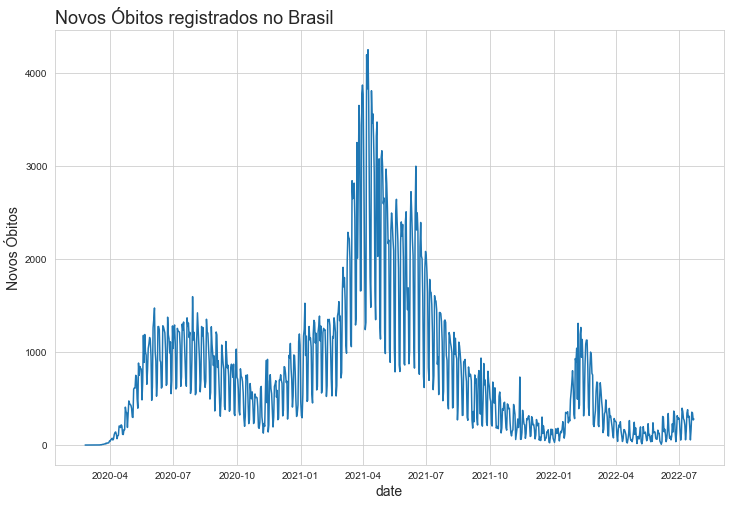

In [120]:
#Avaliação geral da curva de mortes no Brasil

#inputs:
data = df_br_br
title = 'Novos Óbitos registrados no Brasil'
x = df_br_br.data
y = df_br_br.obitosNovos
hue = None
xlabel = 'date'
ylabel = 'Novos Óbitos'


#Plotting routine
plottimeseries(title, xlabel, ylabel, x, y, data, hue)


In [121]:
#Avaliando quais estados mais tiveram mortes:

# 1) Criando coluna de morte por 100k Pessoas

#df_br_es_100  = df_br_es
#df_br_es_100['obitosp100k'] = ''

#df_br_es_100['obitosp100k'] = df_br_es_100['obitosNovos'] / (df_br_es_100['populacaoTCU2019'])

# 2) Criando coluna de novas infecções por 100k habitantes

#df_br_es_100['casosp100k'] = ''

#df_br_es_100['casosp100k'] = df_br_es_100['casosNovos'] / (df_br_es_100['populacaoTCU2019'])

###### Para saber mais sobre os dados, acesse: https://covid.saude.gov.br/

In [122]:
#dropando as colunas que não vou utilizar
pareto_es = df_br_es.drop(columns=[ 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'obitosAcumulado',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'])


        casosNovos  obitosNovos
estado                         
SP         5874616       172459
RJ         2430293        74596
MG         3785949        62721
PR         2678147        44355
RS         2618655        40357


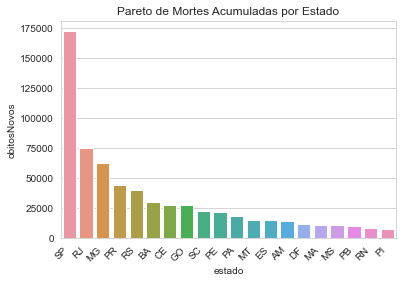

In [123]:
#Criando uma variável com somatório de casos e Obitos por estado para entender mais impactados
pareto_es = pareto_es.groupby(by= ['estado']).sum()
pareto_es = pareto_es.sort_values(by = ['obitosNovos'], ascending=False )
pareto_es_reduzido = pareto_es.head(20)
print(pareto_es_reduzido.head(5))

dx = sns.barplot(x= pareto_es_reduzido.index, y= pareto_es_reduzido.obitosNovos , data = pareto_es_reduzido ,palette = None );
dx.set_xticklabels(dx.get_xticklabels(), rotation=45, ha="right");
dx.set_title('Pareto de Mortes Acumuladas por Estado');


## BOA OPORTUNIDAD DE FAZER UM CLUSTER AQUI:

In [124]:
#Ajustando o Data set que vou utilizar para fazer as análises de 
#df_br_es_filtered = df_br_es.drop(columns=[ 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
#       'nomeRegiaoSaude'])


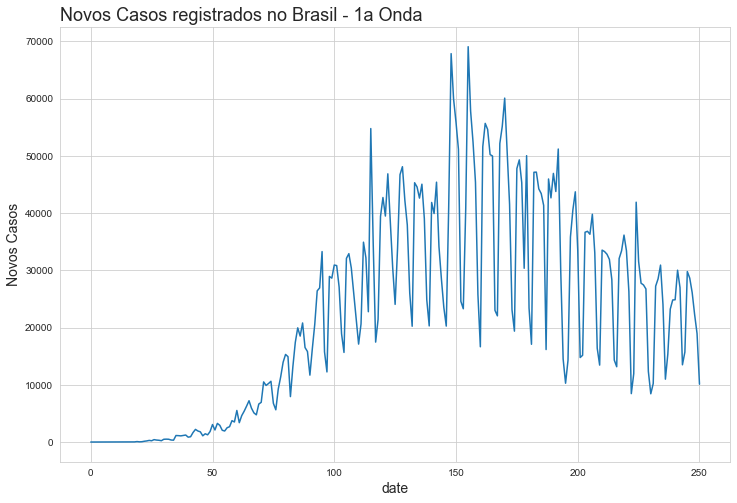

In [139]:
#Plotando a primeira onda para BR:

#inputs:
data = df_br_o1_br
title = 'Novos Casos registrados no Brasil - 1a Onda'
x = df_br_o1_br.index
y = df_br_o1_br.casosNovos
hue = None
xlabel = 'date'
ylabel = 'Novos Casos'


#Plotting routine
plottimeseries(title, xlabel, ylabel, x, y, data, hue)


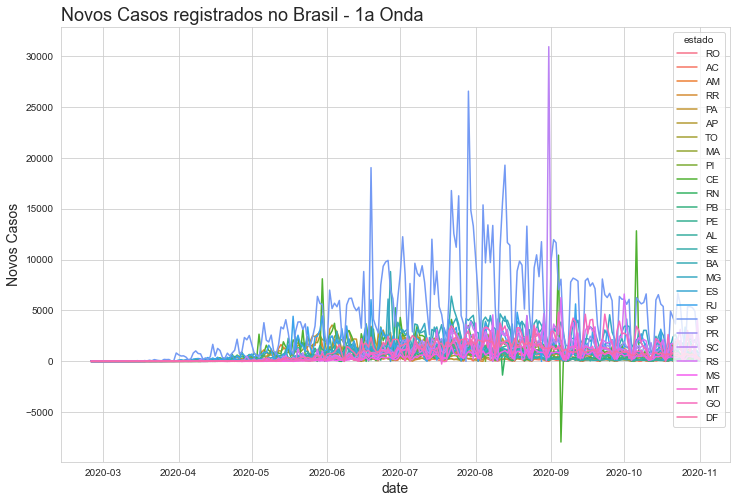

In [153]:
#Plotando a a primera onda para estados
#inputs:
data = df_br_o1_es
title = 'Novos Casos registrados no Brasil - 1a Onda'
x = df_br_o1_es.data
y = df_br_o1_es.casosNovos
hue = df_br_o1_es.estado
xlabel = 'date'
ylabel = 'Novos Casos'


#Plotting routine
plottimeseries(title, xlabel, ylabel, x, y, data, hue)

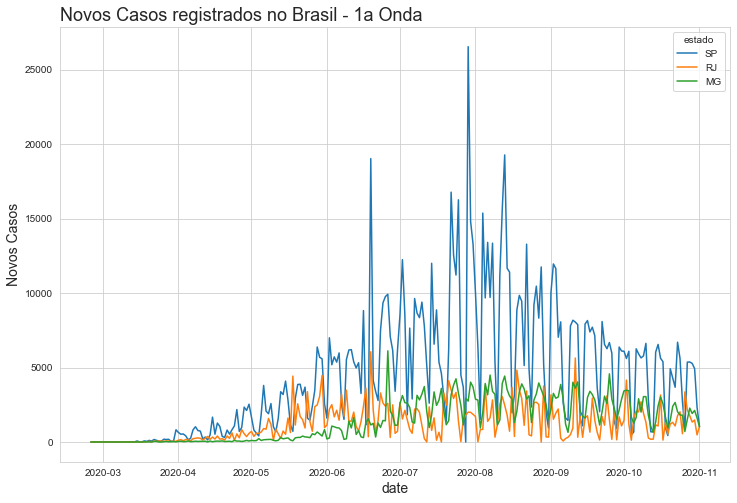

In [160]:
#Plotando a a primera onda para estados de SP, MG e RJ
df_o1_sp = df_br_o1_es[df_br_o1_es.estado == 'SP']
df_o1_rj = df_br_o1_es[df_br_o1_es.estado == 'RJ']
df_o1_mg = df_br_o1_es[df_br_o1_es.estado == 'MG']

#concatenando os 3 novos Dfs
df_br_o1_es_filtrado = pd.concat([df_o1_sp,df_o1_rj,df_o1_mg])


#inputs:
data = df_br_o1_es_filtrado
title = 'Novos Casos registrados no Brasil - 1a Onda'
x = df_br_o1_es_filtrado.data
y = df_br_o1_es_filtrado.casosNovos
hue = df_br_o1_es_filtrado.estado
xlabel = 'date'
ylabel = 'Novos Casos'


#Plotting routine
plottimeseries(title, xlabel, ylabel, x, y, data, hue)

#### Explorando a sazonalidade e plotando média móvel dos dados:

In [168]:
## Banco de dados explodaros:
# df_o1_sp #primeira onda em sp:
# df_br_o1_br #Primeira onda Brasil todo


In [174]:
# Criando Plot com média móvel do Brasil: (tentado reduzir a sazonalidade)
df_br_o1_br['media_7_dias'] = df_br_o1_br['obitosNovos'].rolling(window = 7, center = False,).mean()
df_br_o1_br['media_14_dias'] = df_br_o1_br['obitosNovos'].rolling(window = 14, center = False,).mean()

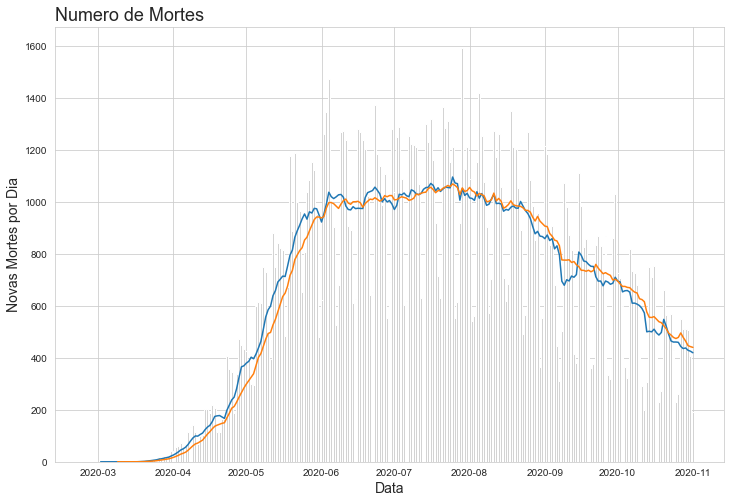

In [176]:
plottimeseries('Numero de Mortes ', 'Data', 'Novas Mortes por Dia ', df_br_o1_br.data , df_br_o1_br['media_7_dias'], df_br_o1_br, None)
plottimeseries('Numero de Mortes ', 'Data', 'Novas Mortes por Dia', df_br_o1_br.data , df_br_o1_br['media_14_dias'], df_br_o1_br, None)
plt.bar(df_br_o1_br.data , df_br_o1_br['obitosNovos'] , color = "lightgrey")
plt.savefig('Número de Mortes Brasil - Primeira onda')

#### Análise de Correlação dos dados

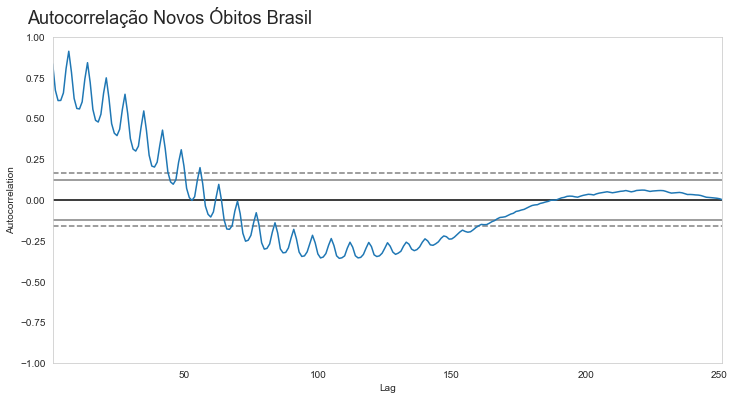

In [179]:
#Importing the Pandas.plotting
from pandas.plotting import autocorrelation_plot

# Inputs________________________
dataset = df_br_o1_br['obitosNovos']
title = 'Autocorrelação Novos Óbitos Brasil'

# Plotting _____________________
ax = plt.figure(figsize=(12,6))
autocorrelation_plot(dataset)
ax.suptitle(title,fontsize=18, x=0.26, y=0.95) #locking the title on the left
ax=ax
plt.savefig(title)

Comportamento estranho de picos a cada 7 lags

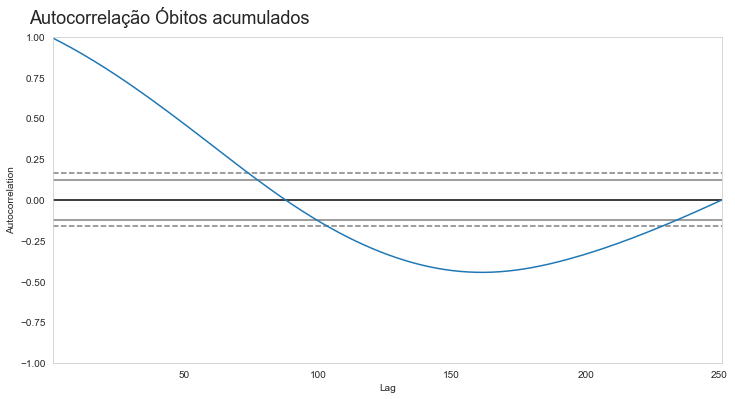

In [181]:
#Importing the Pandas.plotting
from pandas.plotting import autocorrelation_plot

# Inputs________________________
dataset = df_br_o1_br['obitosAcumulado']
title = 'Autocorrelação Óbitos acumulados'

# Plotting _____________________
ax = plt.figure(figsize=(12,6))
autocorrelation_plot(dataset)
ax.suptitle(title,fontsize=18, x=0.26, y=0.95) #locking the title on the left
ax=ax
plt.savefig(title)

Óbitos acumulados não apresentam aqueles picos de 7 em 7 lags

#### Separando Sazonalidade, Tendencia:

In [182]:
# Importing important libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

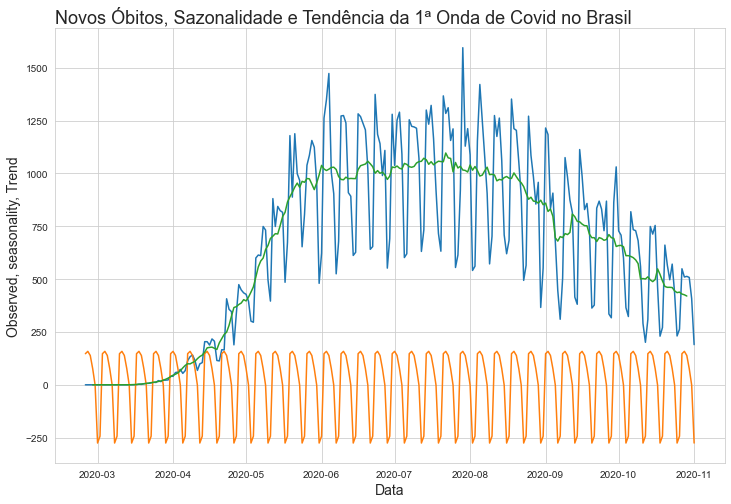

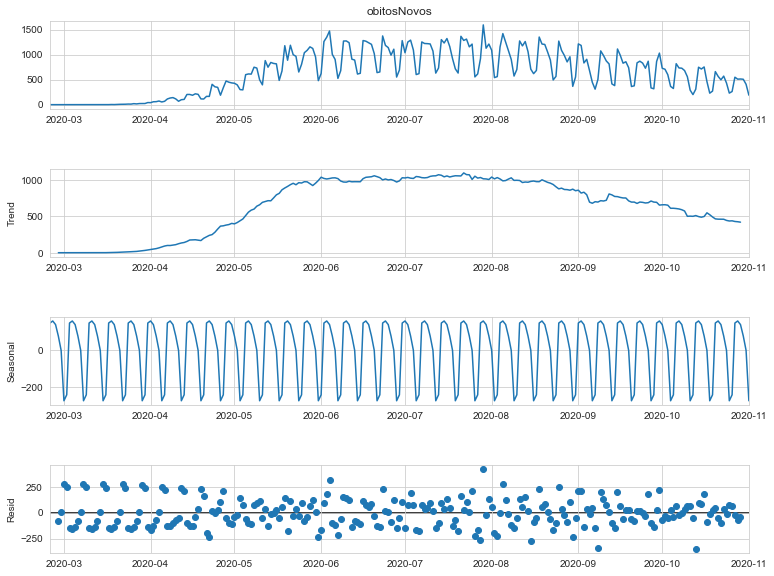

In [210]:
#Decomposing the data into week seasonally
df = df_br_o1_br
data = df_br_o1_br.data
Titulo='Novos Óbitos, Sazonalidade e Tendência da 1ª Onda de Covid no Brasil'
xlabel= 'Data'
ylabel='Observed, seasonality, Trend'


############################# ROTINA DE PLOT: ######################
df.index = pd.to_datetime(df.data) #First changing the index, this is not mandatory but will be more clean to see
results = seasonal_decompose(df['obitosNovos'],period=7)

#plotting the results:
plottimeseries(Titulo,xlabel ,ylabel, data,results.observed,df,None)
plottimeseries(Titulo,xlabel ,ylabel, data,results.seasonal,df,None)
plottimeseries(Titulo,xlabel ,ylabel, data,results.trend,df,None)
plt.savefig(Titlulo + 'A')

#Protando de uma segunda forma?

res = results.plot(weights=False)
res.set_size_inches((12, 9))
plt.savefig(Titulo + 'B')




#### Testando Estacionaridade:


In [227]:
#___Importing the Libraries:
from statsmodels.tsa.stattools import adfuller

#___Creating the Y variable for analysis

y = df_br_o1_br.casosNovos

#____Analysins the Pvalue

adfullertest = adfuller(y.dropna())
pvalue = adfullertest[1]

### if pvalue > 0,05 this series is not stationary
print(f'pvalue = ', adfullertest[1])
if (pvalue>=0.05):
    print('This serie is not stationary')
else:
    print('This serie is stationary')


pvalue =  0.525252552705535
This serie is not stationary


In [228]:
#___Creating the Y variable for analysis

y = df_br_o1_br.casosNovos.diff()

#____Analysins the Pvalue

adfullertest = adfuller(y.dropna())
pvalue = adfullertest[1]

### if pvalue > 0,05 this series is not stationary
print(f'pvalue = ', adfullertest[1])
if (pvalue>=0.05):
    print('This serie is not stationary')
else:
    print('This serie is stationary')


pvalue =  0.00014550668128904335
This serie is stationary


Após a primeira diferenciação, já encontramos um dado estacionário

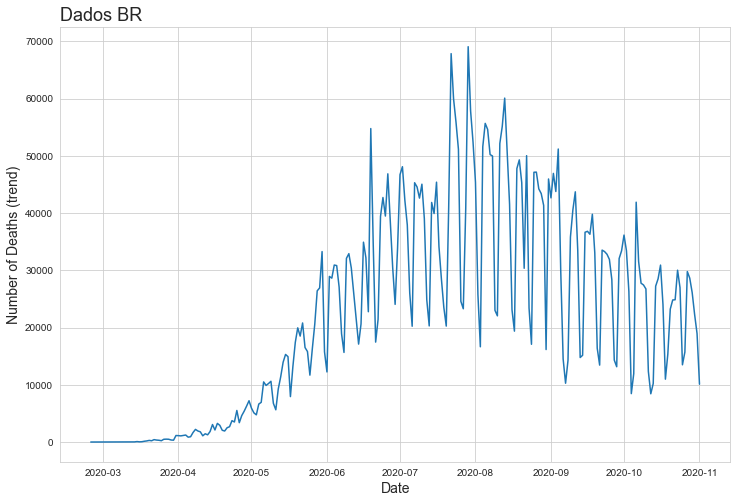

In [230]:
#plotando os dados mais uma vez
plottimeseries('Dados BR','Date','Number of Deaths (trend)',df_br_o1_br.index,df_br_o1_br.casosNovos,df_br_o1_br,None)



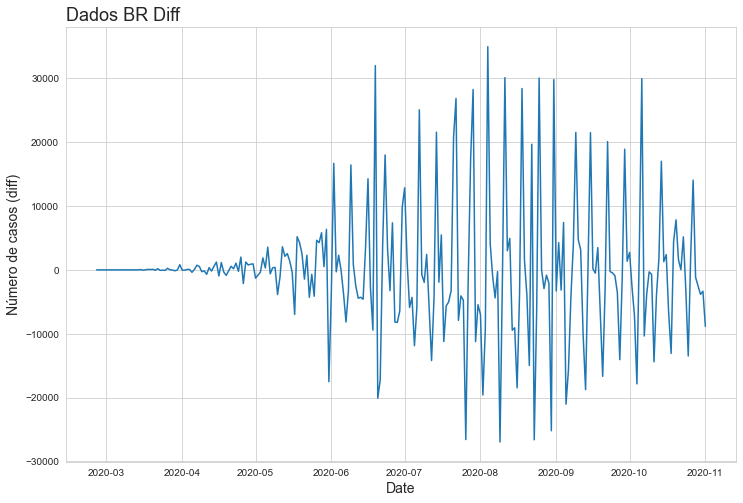

In [231]:
plottimeseries('Dados BR Diff','Date','Número de casos (diff)',df_br_o1_br.index,df_br_o1_br.casosNovos.diff(),df_br_o1_br,None)

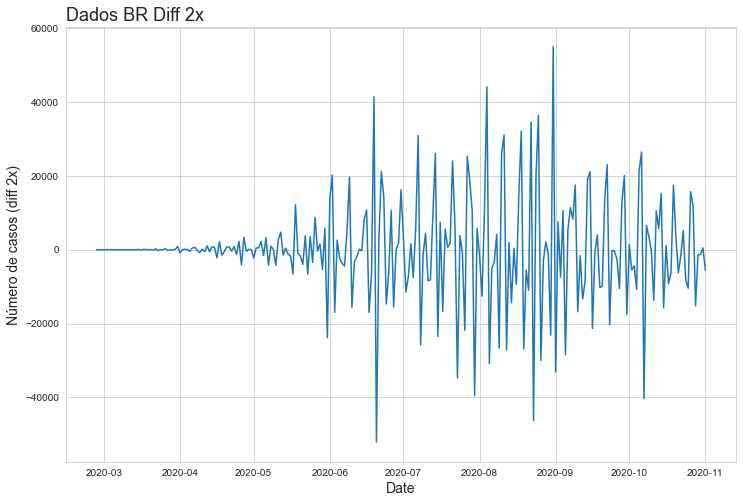

In [232]:
plottimeseries('Dados BR Diff 2x','Date','Número de casos (diff 2x)',df_br_o1_br.index,df_br_o1_br.casosNovos.diff().diff(),df_br_o1_br,None)

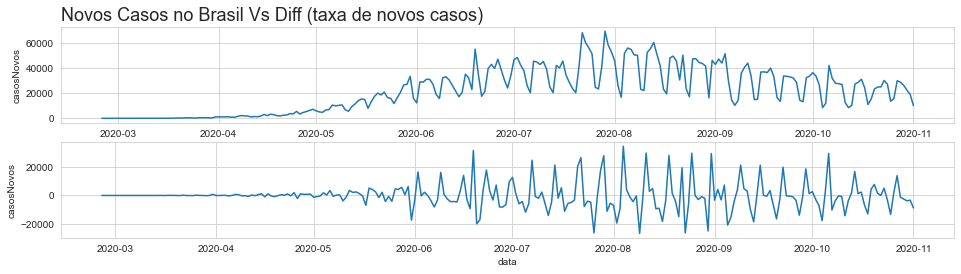

In [236]:
#Exploring graphically the rates:

#inputing date data to be compared:
x = df_br_o1_br.data
y1 = df_br_o1_br.casosNovos
y2 = df_br_o1_br.casosNovos.diff()
data = df_br_o1_br
title = 'Novos Casos no Brasil Vs Diff (taxa de novos casos)'

#Ploting routine:
graphcomp2(x,y1,y2,data,title)
plt.savefig(title)

#### Autocorrelação e Autocorrelação Parcial (ADF e PACF)

In [240]:
#___Importing the Libraries:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Creating a routine to plot the funcion and their diff
def plotacf(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1, ax=ax1, title = 'Observed - ACF')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2, ax=ax2, title = 'First Y Diff - ACF' )
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3, ax=ax3, title = 'Second Y Diff - ACF')

def plotpacf(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_pacf(y1, ax=ax1, title = 'Observed - PACF')
    ax2 = fig.add_subplot(312)
    fig = plot_pacf(y2, ax=ax2, title = 'First Y Diff - PACF')
    ax3 = fig.add_subplot(313)
    fig = plot_pacf(y3, ax=ax3, title = 'Second Y Diff - PACF')
 

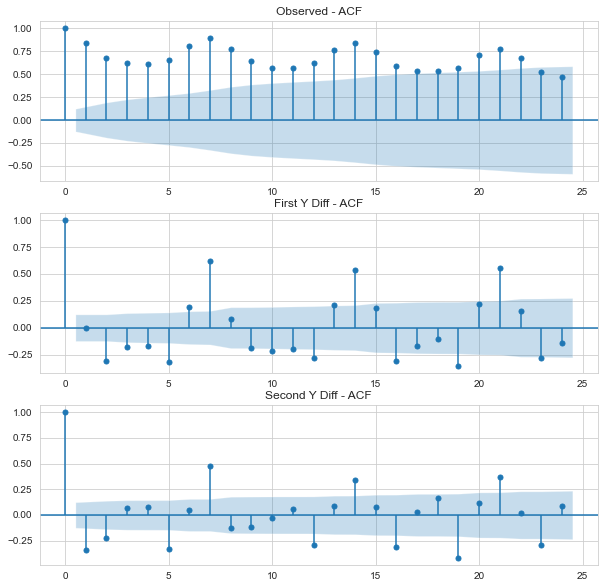

In [241]:
# Plottig the ACF from Y

y1 = df_br_o1_br.casosNovos

#Creating the differences:
y2 = y1.diff().dropna()
y3 = y2.diff().dropna()

#plotting the results

plotacf(y1,y2,y3)
plt.savefig('Autocorrelation Analysis')

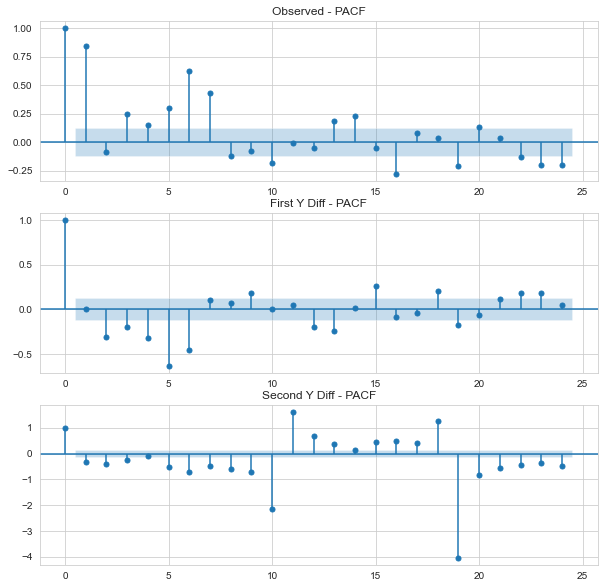

In [242]:
# Plottig the ACF from Y

y1 = df_br_o1_br.casosNovos

#Creating the differences:
y2 = y1.diff().dropna()
y3 = y2.diff().dropna()

#plotting the results

plotpacf(y1,y2,y3)
plt.savefig('Partial Autocorrelation Analysis')

#### Modelo Arima

In [250]:
# MODELO ARIMA
#___Importing the Libraries:

from statsmodels.tsa.arima_model import ARIMA

#________________creating the model:
#variable:
y = df_br_o1_br.casosNovos
#P: 
P = 1 #
#D:
D = 1 #Somente uma diferenciação já foi sufiente para estacionaridade
#Q:
Q = 1 #

#creating the ARIMA model:
model = ARIMA(y,order=(P,D,Q))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.casosNovos   No. Observations:                  250
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2624.453
Method:                       css-mle   S.D. of innovations           8751.926
Date:                Tue, 26 Jul 2022   AIC                           5256.907
Time:                        23:29:09   BIC                           5270.992
Sample:                    02-26-2020   HQIC                          5262.576
                         - 11-01-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 90.0495     95.522      0.943      0.346     -97.170     277.269
ar.L1.D.casosNovos     0.4482      0.063      7.088      0.000       0.324       0.572
ma.L1.D.casosNovos  

Análisando a resposta do ARIMA:
AIC: Critério de informação Akaike (Métrica de distância entre seu modelo e o real, quanto menor  melhor)
BIC: Probabilidade do seu modelo ser verdadeiro, quanto menor melhor

#### SARIMA

In [252]:
#for this test, we have to create a range of parameters to build the "possibles" models

#importing libraries:
import itertools

#inputing the range for p, d and q:
p = d = q = range(0,2)

#creating a List of possibilities for p,d and q
pdq = list(itertools.product(p, d, q))

#creating a List of possibilities for p,d and q and Sazonallity_frequency

seasonality_frequency = 7

seasonal_pdq = [(x[0], x[1], x[2], seasonality_frequency) for x in list(itertools.product(p, d, q))]

print('Exemplos de Parametros a serem combinados pelo SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemplos de Parametros a serem combinados pelo SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)


In [254]:
#Creating the model:

#importing lib:
import statsmodels.api as sm


#Chosing the Y
y = df_br_o1_br.casosNovos

# Creating a DF to collect the best Resutl
aic_list_df = pd.DataFrame(columns = ['pqd' , 'seasonalpdq','AIC','Log Likelihood'])

#looping for choosing the best AIC
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal);
        results = mod.fit();
        
        #now we want to store the results to see the best one in the end       
        #Data Frame
        actual_aic = pd.DataFrame(data = [(param, param_seasonal, results.aic, results.llf)], columns=aic_list_df.columns);
       
        #consolidating DF
        aic_list_df = aic_list_df.append(actual_aic,ignore_index=True)

In [255]:
#The result DF Was:
aic_list_df.head(5)

#The Best AIC was:
print(f'The Best AIC was:______',aic_list_df.AIC.min())

#The log likelyhood was:
print(f'The Best Log Likelihood was:______',aic_list_df['Log Likelihood'].max())


#The best parameter was:
print('The Top 3 Best parameter for the best model was______________')
aic_list_df.sort_values('AIC', inplace=True,ignore_index=True)
aic_list_df.head(3)

The Best AIC was:______ 4920.674689177658
The Best Log Likelihood was:______ -2456.337344588829
The Top 3 Best parameter for the best model was______________


,pqd,seasonalpdq,AIC,Log Likelihood
0,"(1, 1, 1)","(0, 1, 1, 7)",4920.674689,-2456.337345
1,"(1, 0, 1)","(0, 1, 1, 7)",4945.947410,-2468.973705
2,"(1, 1, 1)","(1, 1, 1, 7)",4946.513067,-2468.256533


pdq parameter used:__________pdq =  (1, 1, 1)
seasonal_pdq parameter used:__________p,d,q and seasonal frequecy =  (0, 1, 1, 7)


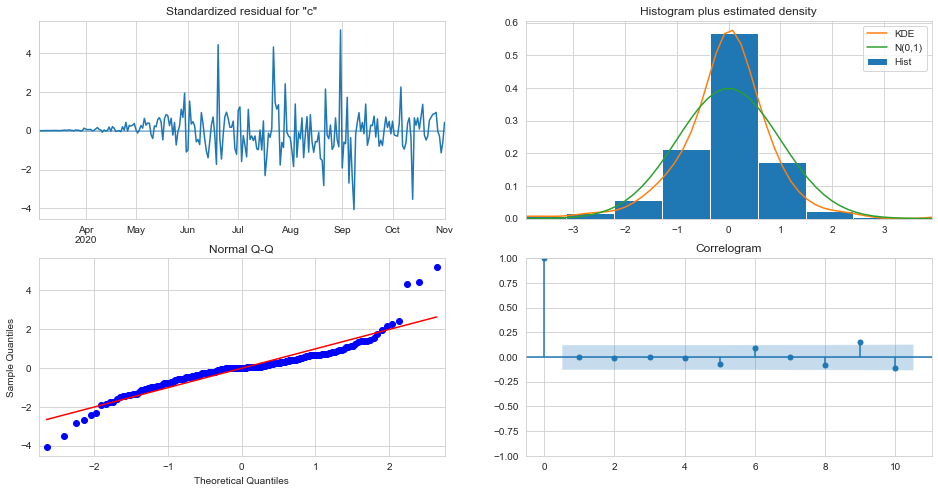

In [261]:
#Fitting the best Model:

mod = sm.tsa.statespace.SARIMAX(y,
                               order = (aic_list_df.pqd[0]), #here we use the 
                               seasonal_order=(aic_list_df.seasonalpdq[0]))
results = mod.fit()

# Parameter used:
print(f'pdq parameter used:__________pdq = ',aic_list_df.pqd[0])
print(f'seasonal_pdq parameter used:__________p,d,q and seasonal frequecy = ',aic_list_df.seasonalpdq[0])



#plottine the results:
results.plot_diagnostics(figsize=(16,8))
plt.savefig('Model Analysis SARIMAX')
plt.show()

In [253]:
df_br_o1_br.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana',
       'media_7_dias', 'media_14_dias'],
      dtype='object')